In [1]:
# Superdense Coding:
#         a procedure that allows you to send two classical bits to another party using
#         another party using just a single quibt of communication.

In [13]:
#import statements:
from qiskit import*
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
# helps to get nicer images:
%config InlineBackend.figure_format = 'svg'

In [8]:
# Define a function that takes a QuantumCircuit and two integers a&b
def create_bell_pair(qc,a,b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

In [4]:
# Define a function that takes a QuantumCircuit (qc)
# a wubit index (qubit) and a message string (msg)
def encode_message(qc,qubit,msg):
    if msg == "00":
        pass # to send 00 we do nothing
    elif msg == "10":
        qc.x(qubit) # To send 01 we apply x-gate
    elif msg == "01":
        qc.z(qubit) # To send 01 we apply a z-gate
    elif msg == "11":
        qc.z(qubit) # To send 11, we apply a z-gate
        qc.x(qubit) # followed by an x-gate
    else:
        print("Ivalid Message: sending '00' ")
    

In [5]:
# uses a cnot gate followed by a H-gate to decode msg
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

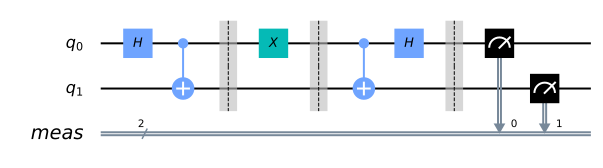

In [9]:
# our main code portion where we create our circuit:
qc = QuantumCircuit(2) # create a 2 qubit quantum circuit
# entangles our qubits:
create_bell_pair(qc,0,1)
qc.barrier() # used to separate the gates in our diagram
# choose  and then encode our msg:
message ="10"
encode_message(qc,0,message)
qc.barrier()
# decode message
decode_message(qc,0,1)
# measure qubits to check message
qc.measure_all()
#draw circuit:
qc.draw(output = "mpl")



{'10': 1024}


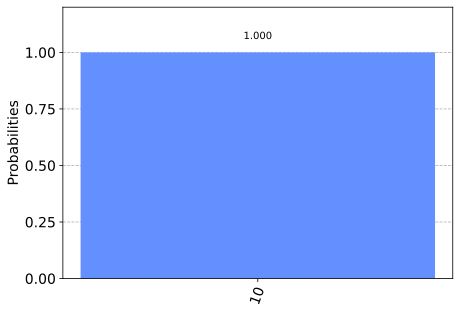

In [11]:
#visualize results:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

ibmqfactory.load_account:WARNING:2020-06-13 09:31:26,759: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2
Job Status: job has successfully run


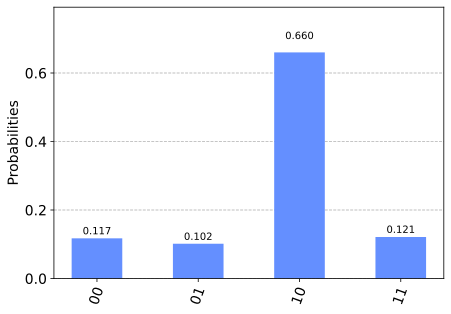

In [16]:
# Using a real Quantum Computer:
shots = 256
#load local account inoformation:
IBMQ.load_account()
# Get the lear busy backend:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
job = execute(qc, backend=backend, shots=shots)
job_monitor(job)
#plotting results:
result = job.result()
plot_histogram(result.get_counts(qc))